In [1]:
import cv2
import glob
import pydicom
import numpy as np
import pandas as pd
import torch
import torch.optim as optim
from albumentations import Compose, ShiftScaleRotate, Resize
from albumentations import CenterCrop, HorizontalFlip
from torch.utils.data import Dataset
from tqdm import tqdm_notebook as tqdm
from matplotlib import pyplot as plt
import pydicom
import os
from sklearn.model_selection import StratifiedKFold
import datetime
from sklearn.metrics import log_loss
import pydicom as dcm
from torchvision import datasets

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
dataDir = "../input/body-morphometry-kidney-and-tumor/train/DICOM/training001/"
raw_file = []

for file in os.listdir( dataDir ):
    raw_file.append(dcm.read_file(dataDir + file))
    

In [4]:
import imageio
import glob
im = []
for im_path in glob.glob("../input/body-morphometry-kidney-and-tumor/train/Label/training001/*.png"):
    
    im.append(imageio.imread(im_path))
#     print(im.shape)

In [5]:
len(im)

64

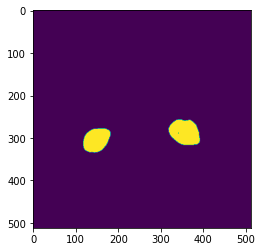

In [6]:
plt.imshow(im[10])

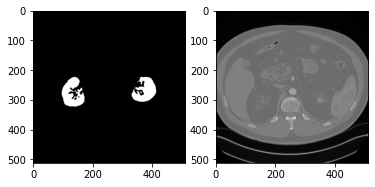

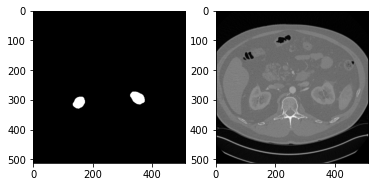

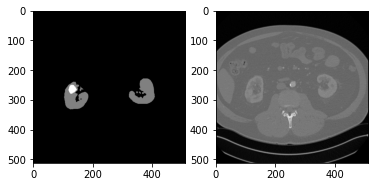

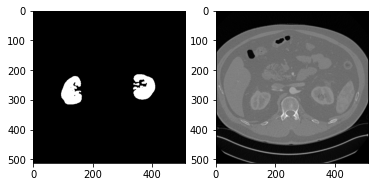

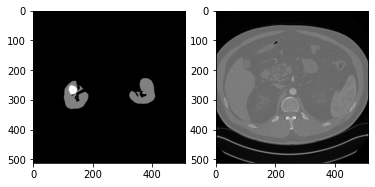

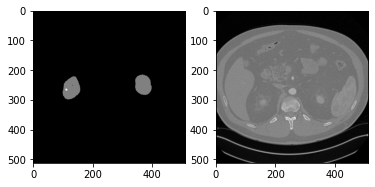

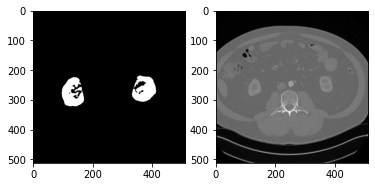

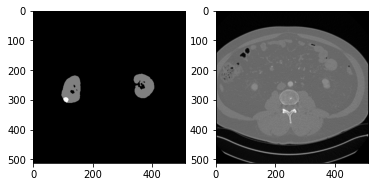

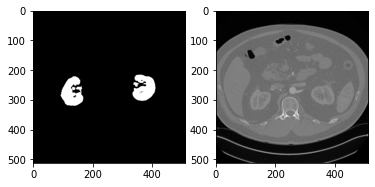

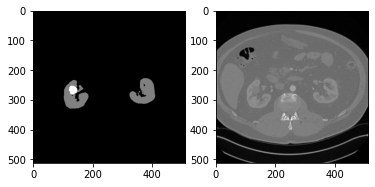

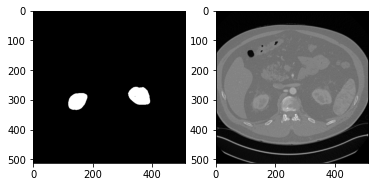

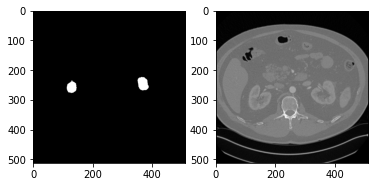

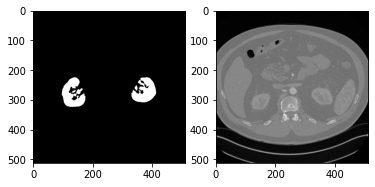

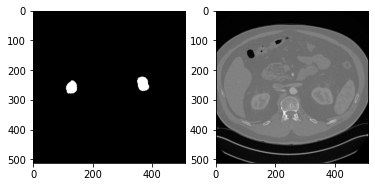

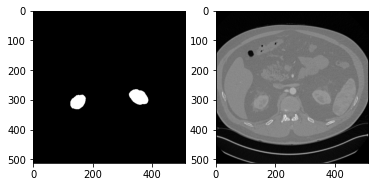

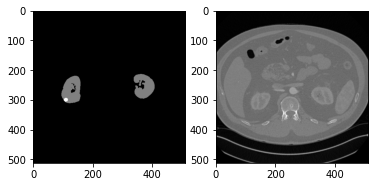

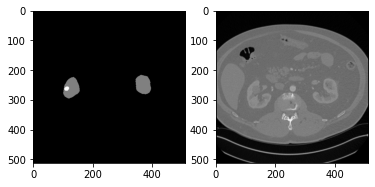

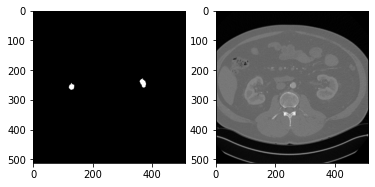

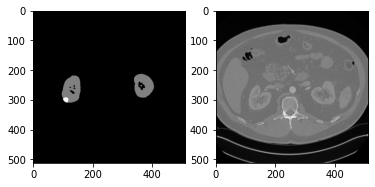

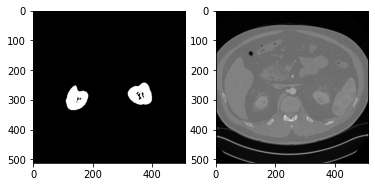

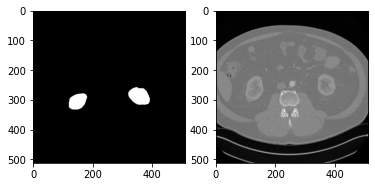

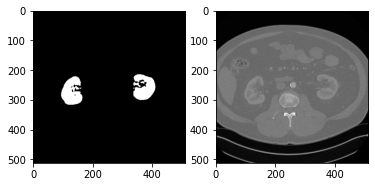

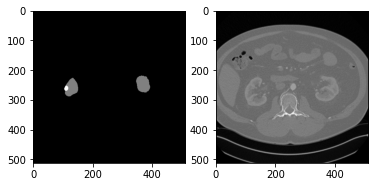

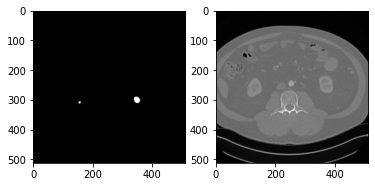

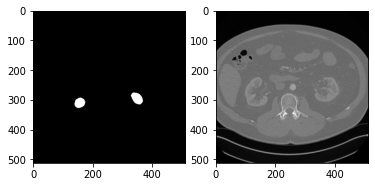

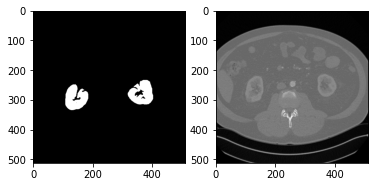

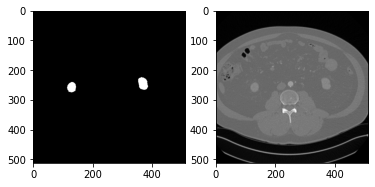

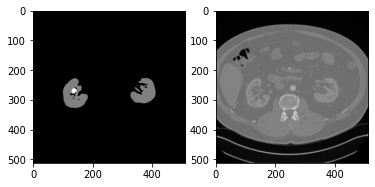

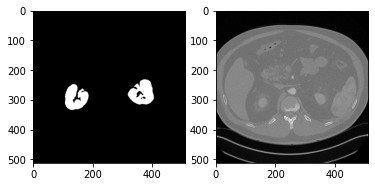

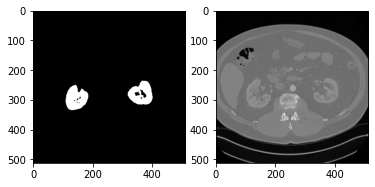

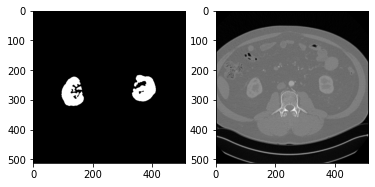

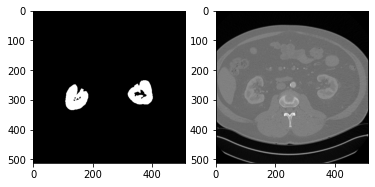

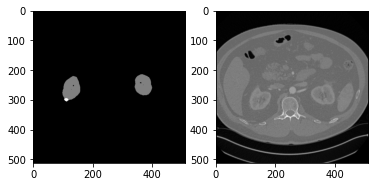

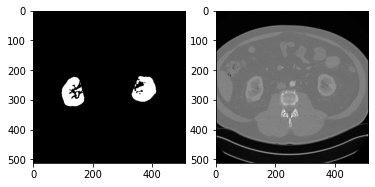

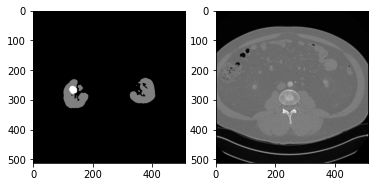

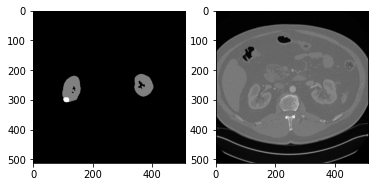

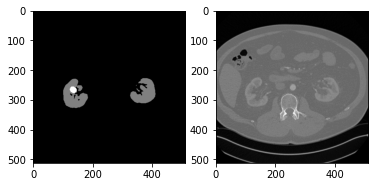

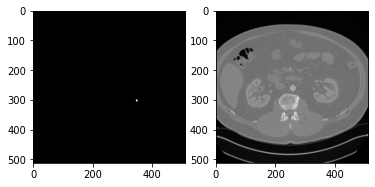

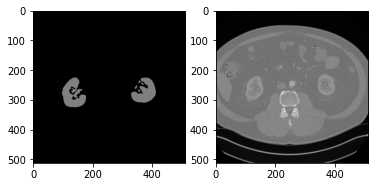

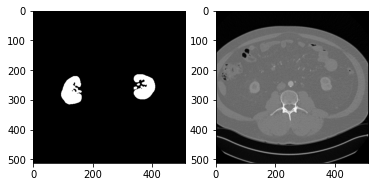

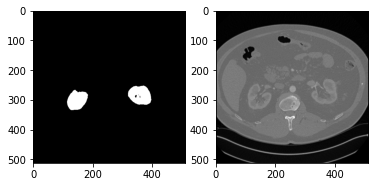

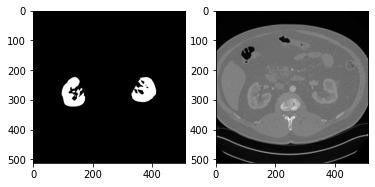

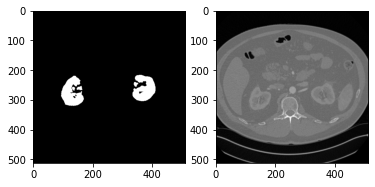

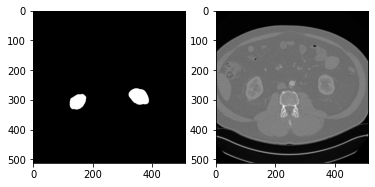

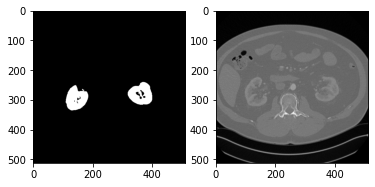

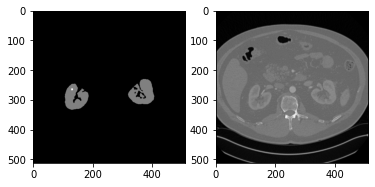

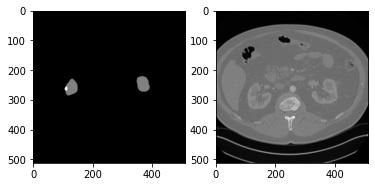

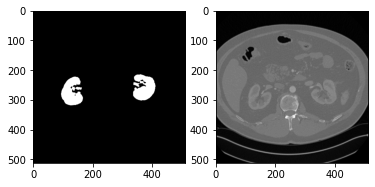

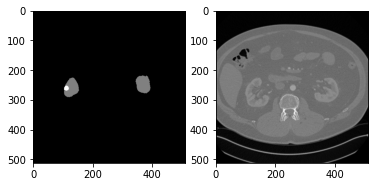

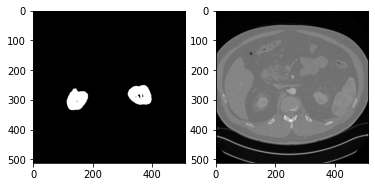

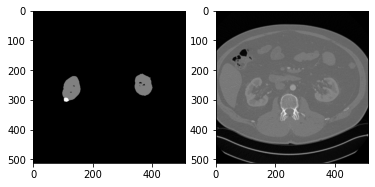

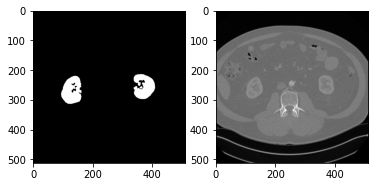

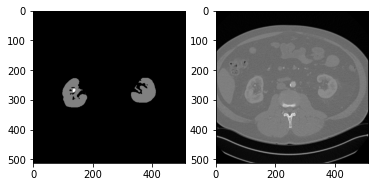

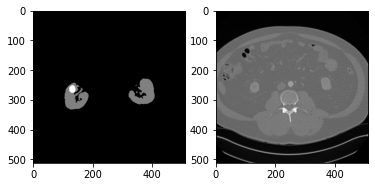

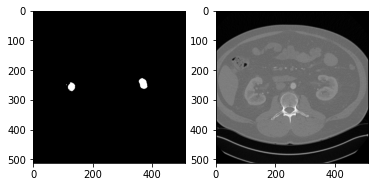

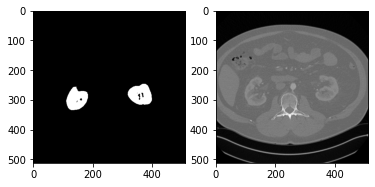

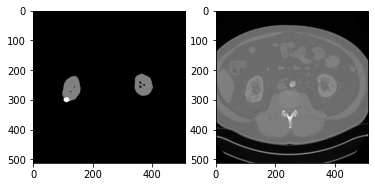

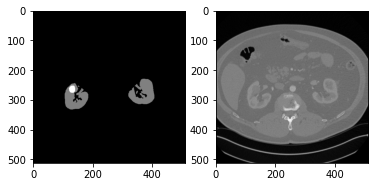

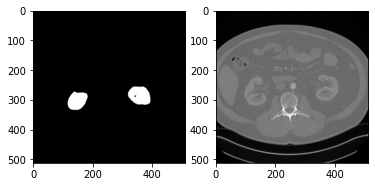

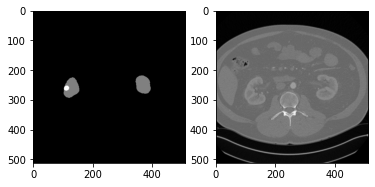

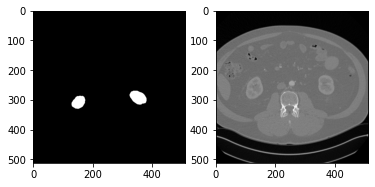

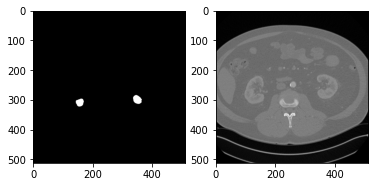

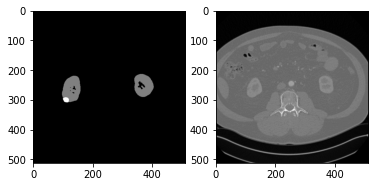

In [7]:

for i in range(63):
    plt.subplot(1,2,1)
    plt.imshow(im[i], cmap = 'gray')
    plt.subplot(1,2,2)
    image = raw_file[i].pixel_array
    plt.imshow(image, cmap='gray')
    plt.show()

In [8]:
len(raw_file)

64

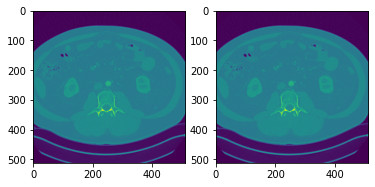

In [9]:
import matplotlib.pyplot as plt
image = raw_file[62].pixel_array
image1 = image.astype(np.float32)/255
# image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.subplot(1,2,1)
plt.imshow(image1)
plt.subplot(1,2,2)
image = raw_file[i].pixel_array
plt.imshow(image)
plt.show()

In [ ]:
def rle_encode(mask_image):
    pixels = mask_image.flatten()
    pixels[0] = 0
    pixels[-1] = 0
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 2
    runs[1::2] = runs[1::2] - runs[:-1:2]
    return runs


def rle_to_string(runs):
    return ' '.join(str(x) for x in runs)


preds_string=[]
for i in tqdm(range(0, len(preds), 64)):
    sample = preds[i:i+64].copy()
    for label_code in [1,2]:
        tmp=[]
        for s in sample:
            s = np.equal(s, label_code).flatten()*1
            tmp+=s.tolist()
        enc = rle_to_string(rle_encode(np.array(tmp)))

        preds_string.append(enc)


sample_submission = pd.read_csv('dataset/sample_submission.csv')
sample_submission['EncodedPixels'] = preds_string
sample_submission.to_csv('submission.csv', index=False)